In [ ]:
# import libraries 
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np

In [ ]:
# create data
def get_train_data(operation: str, flag_net):

  if flag_net == 1:
    X = torch.Tensor([[0., 0., 0.],[0., 1., 0.],[1., 0., 0.],[1., 1., 1.]])
  elif flag_net == 2:
    X = torch.Tensor([[0., 0.],[0., 1.],[1., 0.],[1., 1.]])
  else:
    raise ValueError('Введите корректный флаг(номер класса XOR) для получения данных')

  if operation == "XOR":
    y = torch.Tensor([0., 1., 1., 0.]).reshape(X.shape[0], 1)
  elif operation == "AND":
    y = torch.Tensor([0., 0., 0., 1.]).reshape(X.shape[0], 1)
  elif operation == "OR":
    y = torch.Tensor([0., 1., 1., 1.]).reshape(X.shape[0], 1)

  return X, y

# Задание 1
1. Реализуйте и обучите две нейронные сети, реализующиие операции искоючающего ИЛИ:
-  Однослойный персептрон, с попполнением состава признаков (class XOR1)
-  Двухслойная сеть (class XOR2)


##XOR1

In [ ]:
class XOR1(nn.Module):
  """
  Реализация нейронной сети для операции исключающего или
  на основе односслойной сети 
  """
  def __init__(self):
      super(XOR1, self).__init__()
      self.linear = nn.Linear(3, 1)
      self.sigmoid = nn.Sigmoid()
      pass

  def forward(self, input):
    x = self.linear(input)
    x = self.sigmoid(x)
    return x

In [ ]:
epochs_1 = 1000
model_1 = XOR1()
mseloss_1 = nn.BCELoss()
optimizer_1 = torch.optim.Adam(model_1.parameters(), lr = 0.05)
all_losses_1 = []
plot_every_1 = 50
model_1.train()

for epoch in range(epochs_1):
  # remove gradients for iteration
  optimizer_1.zero_grad()

  X_1, y_1 = get_train_data("XOR", 1)

  # input training example and return the prediction
  out_1 = model_1(X_1)

  # calculate MSE loss
  loss_1 = mseloss_1(out_1, y_1)
  
  # backpropogate through the loss gradiants
  loss_1.backward()

  # update model weights
  optimizer_1.step()

  loss_val_1 = loss_1.item()
  all_losses_1.append(loss_val_1)
  
  # print progress
  if epoch % plot_every_1 == 0:
    print(f'Epoch: {epoch} completed, loss: {loss_val_1}')
    

Epoch: 0 completed, loss: 0.7640358209609985
Epoch: 50 completed, loss: 0.4810711741447449
Epoch: 100 completed, loss: 0.31457316875457764
Epoch: 150 completed, loss: 0.21740511059761047
Epoch: 200 completed, loss: 0.15837377309799194
Epoch: 250 completed, loss: 0.12051359564065933
Epoch: 300 completed, loss: 0.09495195746421814
Epoch: 350 completed, loss: 0.07691384851932526
Epoch: 400 completed, loss: 0.06370562314987183
Epoch: 450 completed, loss: 0.053731948137283325
Epoch: 500 completed, loss: 0.04600437358021736
Epoch: 550 completed, loss: 0.039885856211185455
Epoch: 600 completed, loss: 0.03495097532868385
Epoch: 650 completed, loss: 0.030907150357961655
Epoch: 700 completed, loss: 0.02754758484661579
Epoch: 750 completed, loss: 0.024722781032323837
Epoch: 800 completed, loss: 0.022322343662381172
Epoch: 850 completed, loss: 0.02026333101093769
Epoch: 900 completed, loss: 0.018482379615306854
Epoch: 950 completed, loss: 0.016930345445871353


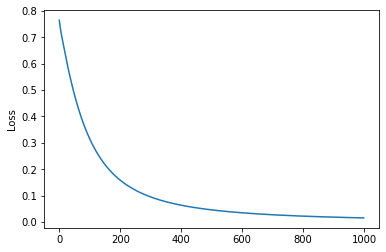

In [ ]:
import matplotlib.pyplot as plt
plt.plot(all_losses_1)
plt.ylabel('Loss')
plt.show()

In [ ]:
# show weights and bias
for name, param in model_1.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear.weight tensor([[  8.2773,   8.2701, -16.6202]])
linear.bias tensor([-4.1156])


In [ ]:
from torch.nn.modules.container import ModuleList
# test input
model_1.eval()
input_1 = torch.tensor([[0.0, 1., 0.0]])
out_1 = model_1(input_1)
print(out_1)

tensor([[0.9845]], grad_fn=<SigmoidBackward0>)


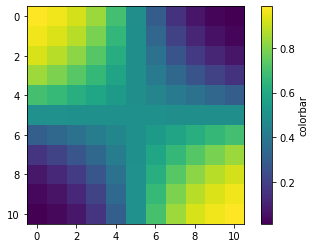

In [ ]:
model_1.eval()

# draw heatmap
sz_1 = 11
x_1 = np.linspace(0, 1, sz_1, dtype = np.float32)
y_1 = np.linspace(1, 0, sz_1, dtype = np.float32)
x_1 = np.repeat(x_1,sz_1).reshape((sz_1,sz_1))
y_1 = np.repeat(y_1,sz_1).reshape((sz_1,sz_1))
xy_1 = np.dstack((x_1.T,y_1,x_1.T*y_1))

with torch.no_grad():
  input_1 = torch.from_numpy(xy_1.reshape((sz_1*sz_1,3)))
  out_1 = model_1(input_1)
  out_1 = out_1.numpy().reshape((sz_1,sz_1))

fig_1, ax_1 = plt.subplots()
im_1 = ax_1.imshow(out_1)
fig_1.colorbar(im_1, ax=ax_1, label='colorbar')
plt.show()

##XOR2

In [ ]:
class XOR2(nn.Module):
    """
    Реализация нейронной сети для операции исключающего или
    на основе двухслойной сети 
    """
    def __init__(self):
      super(XOR2, self).__init__()
      self.fc1  = nn.Linear(2, 5)
      self.act1  = nn.Sigmoid()
      self.fc2  = nn.Linear(5, 1)
      self.act2  = nn.Sigmoid()

    def forward(self, input):
      x = self.fc1(input)
      x = self.act1(x)
      x = self.fc2(x)
      x = self.act2(x)
      return x

In [ ]:
epochs_2 = 1000
model_2 = XOR2()
mseloss_2 = nn.BCELoss()
optimizer_2 = torch.optim.Adam(model_2.parameters(), lr = 0.05)
all_losses_2 = []
plot_every_2 = 50
model_2.train()

for epoch in range(epochs_2):
  # remove gradients for iteration
  optimizer_2.zero_grad()

  X_2, y_2 = get_train_data("XOR", 2)

  # input training example and return the prediction
  out_2 = model_2(X_2)

  # calculate MSE loss
  loss_2 = mseloss_2(out_2, y_2)
  
  # backpropogate through the loss gradiants
  loss_2.backward()

  # update model weights
  optimizer_2.step()

  loss_val_2 = loss_2.item()
  all_losses_2.append(loss_val_2)
  
  # print progress
  if epoch % plot_every_2 == 0:
    print(f'Epoch: {epoch} completed, loss: {loss_val_2}')
    

Epoch: 0 completed, loss: 0.6950802803039551
Epoch: 50 completed, loss: 0.39089471101760864
Epoch: 100 completed, loss: 0.03363817557692528
Epoch: 150 completed, loss: 0.010705635882914066
Epoch: 200 completed, loss: 0.006203856784850359
Epoch: 250 completed, loss: 0.00424323882907629
Epoch: 300 completed, loss: 0.0031511415727436543
Epoch: 350 completed, loss: 0.0024621766060590744
Epoch: 400 completed, loss: 0.0019922531209886074
Epoch: 450 completed, loss: 0.0016538650961592793
Epoch: 500 completed, loss: 0.0014002323150634766
Epoch: 550 completed, loss: 0.0012041741283610463
Epoch: 600 completed, loss: 0.0010488254483789206
Epoch: 650 completed, loss: 0.0009232617449015379
Epoch: 700 completed, loss: 0.0008199983858503401
Epoch: 750 completed, loss: 0.0007338675204664469
Epoch: 800 completed, loss: 0.0006611810531467199
Epoch: 850 completed, loss: 0.0005991620128042996
Epoch: 900 completed, loss: 0.0005456911167129874
Epoch: 950 completed, loss: 0.0004992756294086576


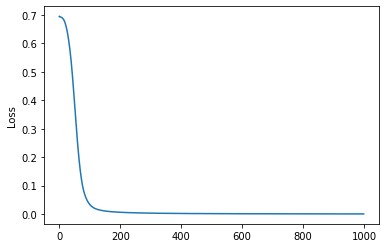

In [ ]:
import matplotlib.pyplot as plt
plt.plot(all_losses_2)
plt.ylabel('Loss')
plt.show()

In [ ]:
# show weights and bias
for name, param in model_2.named_parameters():
    if param.requires_grad:
        print(name, param.data)

fc1.weight tensor([[-6.6869, -6.2675],
        [-6.9606,  6.1800],
        [-4.7558, -4.3960],
        [-6.7299, -6.9936],
        [-6.2829,  7.0928]])
fc1.bias tensor([10.2824,  4.0252,  7.3994,  3.3255, -4.0068])
fc2.weight tensor([[ 6.8581, -7.6126,  4.7035, -9.1644,  7.1369]])
fc2.bias tensor([-2.5604])


In [ ]:
from torch.nn.modules.container import ModuleList
# test input
model_2.eval()
input_2 = torch.tensor([[0.0, 1.]])
out_2 = model_2(input_2)
print(out_2)

tensor([[0.9995]], grad_fn=<SigmoidBackward0>)


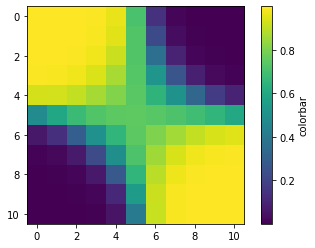

In [ ]:
model_2.eval()

# draw heatmap
sz_2 = 11
x_2 = np.linspace(0, 1, sz_2, dtype = np.float32)
y_2 = np.linspace(1, 0, sz_2, dtype = np.float32)
x_2 = np.repeat(x_2,sz_2).reshape((sz_2,sz_2))
y_2 = np.repeat(y_2,sz_2).reshape((sz_2,sz_2))
xy_2 = np.dstack((x_2.T,y_2))

with torch.no_grad():
  input_2 = torch.from_numpy(xy_2.reshape((sz_2*sz_2,2)))
  out_2 = model_2(input_2)
  out_2 = out_2.numpy().reshape((sz_2,sz_2))

fig_2, ax_2 = plt.subplots()
im_2 = ax_2.imshow(out_2)
fig_2.colorbar(im_2, ax=ax_2, label='colorbar')
plt.show()